# Linear Programming
- **Purpose**: Optimize linear objective subject to linear constraints
- **scipy.optimize**: linprog (Simplex, Interior-Point, Revised Simplex)
- **Applications**: Resource allocation, production planning, logistics

Key concepts:
- **Standard form**: Minimize c^T·x subject to A·x ≤ b, x ≥ 0
- **Feasible region**: Convex polytope defined by constraints
- **Optimal solution**: Always at a vertex (corner point)
- **Simplex method**: Walk along edges to optimal vertex
- **Duality**: Every LP has a dual problem

Real applications:
- **Manufacturing**: Production planning, inventory optimization
- **Supply chain**: Transportation, logistics, distribution
- **Finance**: Portfolio optimization, asset allocation
- **Scheduling**: Staff allocation, job scheduling
- **Telecommunications**: Network flow, routing

In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Linear programming module loaded")

Linear programming module loaded


## Basic Example: Product Mix Problem

**Problem**: Maximize profit from two products

**Products**:
- Product A: Profit = $40, needs 2h labor, 1kg material
- Product B: Profit = $30, needs 1h labor, 2kg material

**Constraints**:
- Labor: 40 hours available
- Material: 50 kg available
- Non-negativity: xₐ, x_b ≥ 0

**Formulation**:
\[
\begin{align}
\max \quad & 40x_A + 30x_B \\
\text{s.t.} \quad & 2x_A + x_B \leq 40 \text{ (labor)} \\
& x_A + 2x_B \leq 50 \text{ (material)} \\
& x_A, x_B \geq 0
\end{align}
\]

Product Mix Optimization

Maximize: 40·xₐ + 30·x_b
Subject to:
  2xₐ + x_b ≤ 40  (labor hours)
  xₐ + 2x_b ≤ 50  (material kg)
  xₐ, x_b ≥ 0

Optimal solution:
  Product A: 10.00 units
  Product B: 20.00 units
  Maximum profit: $1000.00

Resource utilization:
  Labor: 40.00 / 40 hours (100.0%)
  Material: 50.00 / 50 kg (100.0%)

Shadow prices (marginal value of resources):
  Labor constraint slack: 0.00
  Material constraint slack: 0.00


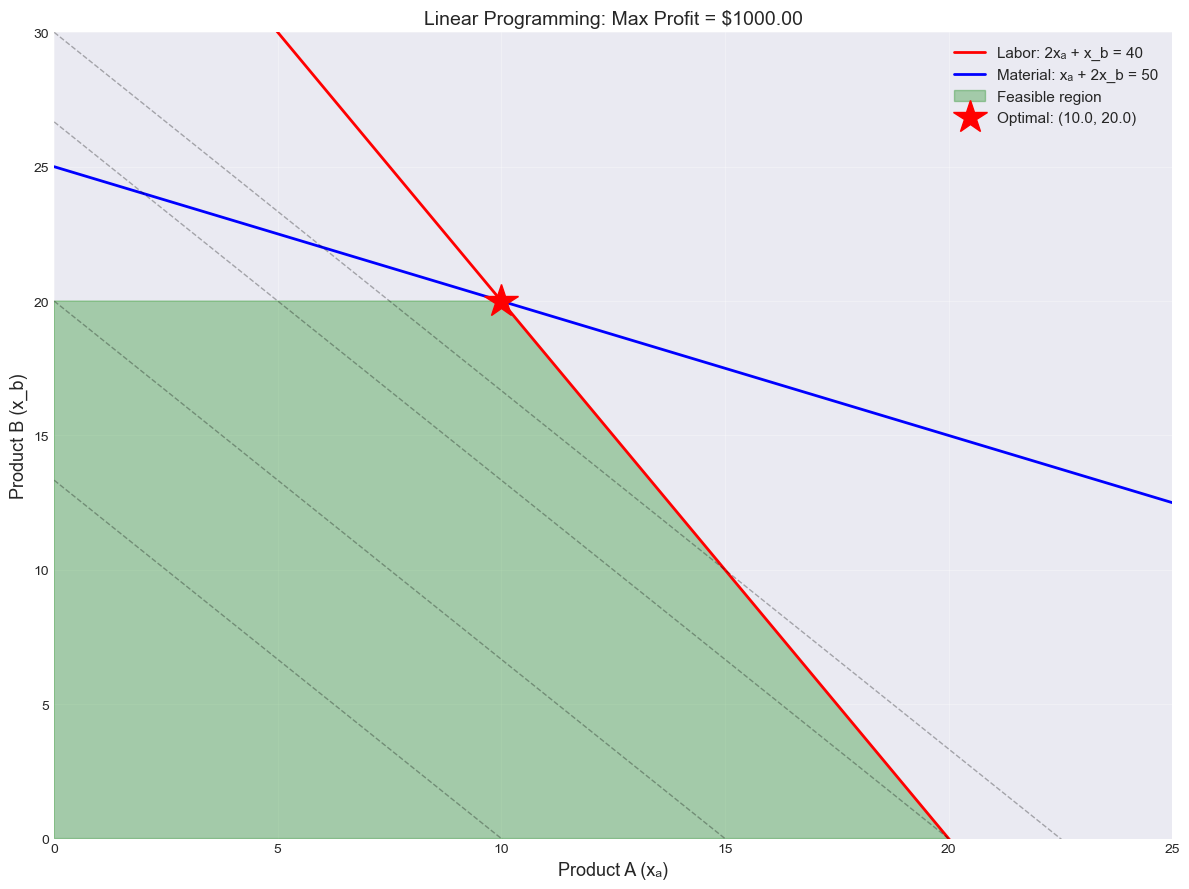


Optimal solution is at a corner of the feasible region!


In [2]:
# Linear programming: maximize c^T·x → minimize -c^T·x
c = [-40, -30]  # Negative because linprog minimizes

# Inequality constraints: A_ub·x ≤ b_ub
A_ub = [
    [2, 1],  # Labor constraint
    [1, 2]   # Material constraint
]
b_ub = [40, 50]

# Bounds: x_A, x_B ≥ 0 (default)
bounds = [(0, None), (0, None)]

print("Product Mix Optimization")
print("\nMaximize: 40·xₐ + 30·x_b")
print("Subject to:")
print("  2xₐ + x_b ≤ 40  (labor hours)")
print("  xₐ + 2x_b ≤ 50  (material kg)")
print("  xₐ, x_b ≥ 0\n")

# Solve
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result.success:
    x_A_opt, x_B_opt = result.x
    max_profit = -result.fun  # Negative because we minimized -profit
    
    print("Optimal solution:")
    print(f"  Product A: {x_A_opt:.2f} units")
    print(f"  Product B: {x_B_opt:.2f} units")
    print(f"  Maximum profit: ${max_profit:.2f}")
    
    # Check resource usage
    labor_used = 2*x_A_opt + x_B_opt
    material_used = x_A_opt + 2*x_B_opt
    
    print(f"\nResource utilization:")
    print(f"  Labor: {labor_used:.2f} / 40 hours ({labor_used/40*100:.1f}%)")
    print(f"  Material: {material_used:.2f} / 50 kg ({material_used/50*100:.1f}%)")
    
    # Shadow prices (dual values)
    print(f"\nShadow prices (marginal value of resources):")
    if hasattr(result, 'slack'):
        print(f"  Labor constraint slack: {result.slack[0]:.2f}")
        print(f"  Material constraint slack: {result.slack[1]:.2f}")
else:
    print("Optimization failed!")

# Visualize feasible region
x_A = np.linspace(0, 30, 300)

# Constraint lines
x_B_labor = 40 - 2*x_A  # Labor constraint
x_B_material = (50 - x_A) / 2  # Material constraint

plt.figure(figsize=(12, 9))

# Plot constraints
plt.plot(x_A, x_B_labor, 'r-', linewidth=2, label='Labor: 2xₐ + x_b = 40')
plt.plot(x_A, x_B_material, 'b-', linewidth=2, label='Material: xₐ + 2x_b = 50')

# Feasible region (polygon)
vertices = np.array([
    [0, 0],           # Origin
    [0, 20],          # Material constraint on y-axis
    [10, 20],         # Intersection
    [20, 0],          # Labor constraint on x-axis
])
poly = Polygon(vertices, alpha=0.3, color='green', label='Feasible region')
plt.gca().add_patch(poly)

# Optimal point
plt.plot(x_A_opt, x_B_opt, 'r*', markersize=25, 
         label=f'Optimal: ({x_A_opt:.1f}, {x_B_opt:.1f})', zorder=5)

# Iso-profit lines
for profit in [400, 600, 800, 900]:
    x_B_isoprofit = (profit - 40*x_A) / 30
    plt.plot(x_A, x_B_isoprofit, 'k--', alpha=0.3, linewidth=1)

plt.xlabel('Product A (xₐ)', fontsize=13)
plt.ylabel('Product B (x_b)', fontsize=13)
plt.title(f'Linear Programming: Max Profit = ${max_profit:.2f}', fontsize=14)
plt.legend(fontsize=11)
plt.xlim(0, 25)
plt.ylim(0, 30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOptimal solution is at a corner of the feasible region!")

## Real Example: Diet Problem (Nutrition Optimization)

**Problem**: Minimize cost while meeting nutritional requirements

**Foods**:
- Bread: $2/unit, 100 cal, 5g protein, 2g fat
- Milk: $3/unit, 150 cal, 8g protein, 5g fat
- Meat: $5/unit, 200 cal, 20g protein, 10g fat

**Requirements**:
- Minimum 2000 calories
- Minimum 50g protein
- Maximum 40g fat

**Goal**: Find cheapest diet meeting all requirements

Diet Optimization Problem

Foods:
  Bread: $2, 100 cal, 5g protein, 2g fat
  Milk:  $3, 150 cal, 8g protein, 5g fat
  Meat:  $5, 200 cal, 20g protein, 10g fat

Requirements:
  ≥ 2000 calories
  ≥ 50g protein
  ≤ 40g fat

Objective: Minimize cost

Optimal diet:
  Bread: 20.00 units
  Milk:  0.00 units
  Meat:  0.00 units

  Minimum cost: $40.00

Nutritional content:
  Calories: 2000 (≥ 2000) ✓
  Protein:  100.0g (≥ 50g) ✓
  Fat:      40.0g (≤ 40g) ✓


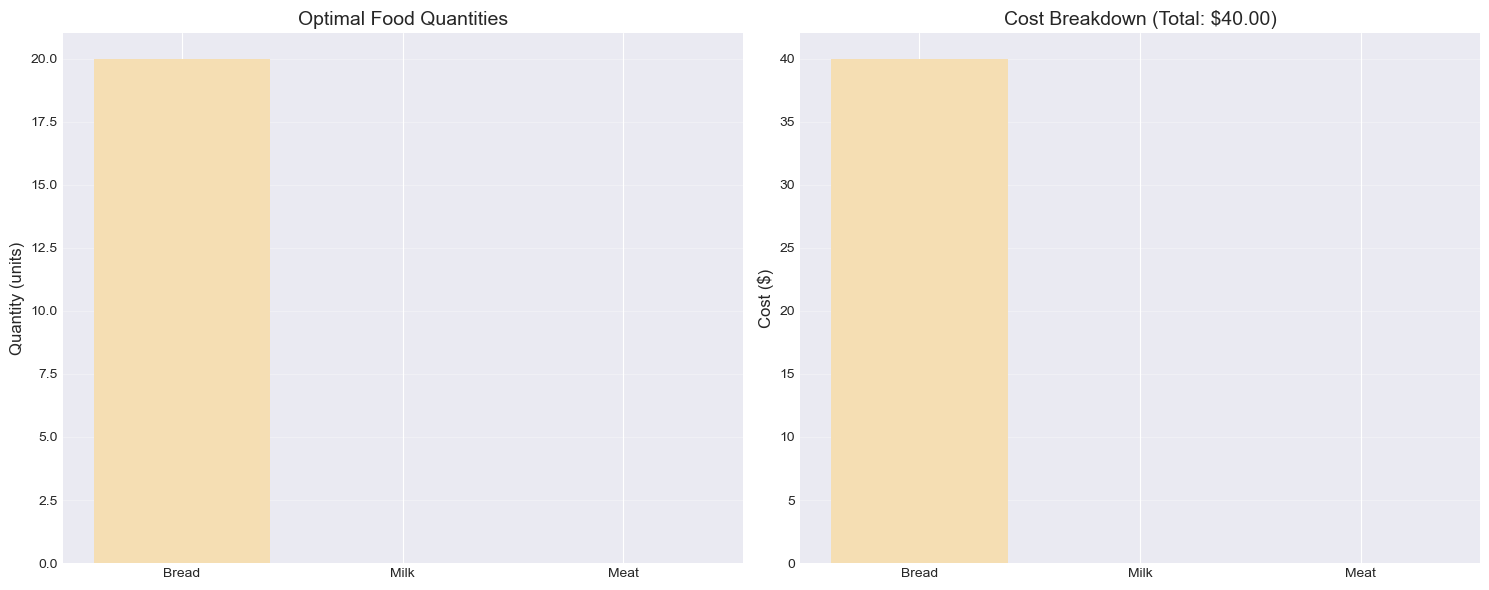


LP finds cheapest diet meeting all nutritional requirements!


In [3]:
# Foods: [Bread, Milk, Meat]
costs = [2, 3, 5]  # Minimize cost

# Nutritional content (per unit)
#             Bread  Milk  Meat
calories = [  100,   150,  200]
protein =  [    5,     8,   20]
fat =      [    2,     5,   10]

# Constraints: A_ub·x ≤ b_ub (convert minimums to maximums)
# Minimum 2000 calories → -calories ≤ -2000
# Minimum 50g protein → -protein ≤ -50
# Maximum 40g fat → fat ≤ 40

A_ub = [
    [-c for c in calories],  # -calories ≤ -2000
    [-p for p in protein],   # -protein ≤ -50
    fat                       # fat ≤ 40
]
b_ub = [-2000, -50, 40]

# Non-negativity
bounds = [(0, None) for _ in range(3)]

print("Diet Optimization Problem")
print("\nFoods:")
print("  Bread: $2, 100 cal, 5g protein, 2g fat")
print("  Milk:  $3, 150 cal, 8g protein, 5g fat")
print("  Meat:  $5, 200 cal, 20g protein, 10g fat")
print("\nRequirements:")
print("  ≥ 2000 calories")
print("  ≥ 50g protein")
print("  ≤ 40g fat")
print("\nObjective: Minimize cost\n")

# Solve
result = linprog(costs, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result.success:
    bread, milk, meat = result.x
    min_cost = result.fun
    
    print("="*50)
    print("Optimal diet:")
    print("="*50)
    print(f"  Bread: {bread:.2f} units")
    print(f"  Milk:  {milk:.2f} units")
    print(f"  Meat:  {meat:.2f} units")
    print(f"\n  Minimum cost: ${min_cost:.2f}")
    
    # Calculate nutrition
    total_cal = sum(result.x[i] * calories[i] for i in range(3))
    total_protein = sum(result.x[i] * protein[i] for i in range(3))
    total_fat = sum(result.x[i] * fat[i] for i in range(3))
    
    print(f"\nNutritional content:")
    print(f"  Calories: {total_cal:.0f} (≥ 2000) {'✓' if total_cal >= 2000 else '✗'}")
    print(f"  Protein:  {total_protein:.1f}g (≥ 50g) {'✓' if total_protein >= 50 else '✗'}")
    print(f"  Fat:      {total_fat:.1f}g (≤ 40g) {'✓' if total_fat <= 40 else '✗'}")
    
    # Visualization
    foods = ['Bread', 'Milk', 'Meat']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Food quantities
    axes[0].bar(foods, result.x, color=['wheat', 'lightblue', 'salmon'])
    axes[0].set_ylabel('Quantity (units)', fontsize=12)
    axes[0].set_title('Optimal Food Quantities', fontsize=14)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Cost breakdown
    cost_breakdown = [result.x[i] * costs[i] for i in range(3)]
    axes[1].bar(foods, cost_breakdown, color=['wheat', 'lightblue', 'salmon'])
    axes[1].set_ylabel('Cost ($)', fontsize=12)
    axes[1].set_title(f'Cost Breakdown (Total: ${min_cost:.2f})', fontsize=14)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No feasible solution!")

print("\nLP finds cheapest diet meeting all nutritional requirements!")

## Real Example: Transportation Problem

**Problem**: Minimize shipping cost from warehouses to stores

**Setup**:
- 2 warehouses with supply: W1 (100 units), W2 (150 units)
- 3 stores with demand: S1 (80), S2 (90), S3 (70)

**Shipping costs** ($/unit):
```
       S1   S2   S3
W1     4    2    3
W2     3    5    2
```

**Constraints**:
- Each warehouse can't ship more than supply
- Each store must receive exactly its demand

**Variables**: x[i][j] = amount shipped from warehouse i to store j

Transportation Problem

Warehouses (supply):
  W1: 100 units
  W2: 150 units
  Total supply: 250

Stores (demand):
  S1: 80 units
  S2: 90 units
  S3: 70 units
  Total demand: 240

Shipping costs ($/unit):
       S1   S2   S3
  W1   4    2    3
  W2   3    5    2

Optimal shipping plan:

       S1    S2    S3   | Shipped
----------------------------------------
  W1     -0     90      0  | 90/100
  W2     80      0     70  | 150/150
----------------------------------------
  Recv     80     90     70  

  Minimum cost: $560.00

Constraint verification:
  W1 shipped 90 ≤ 100 ✓
  W2 shipped 150 ≤ 150 ✓
  S1 received 80 = 80 ✓
  S2 received 90 = 90 ✓
  S3 received 70 = 70 ✓


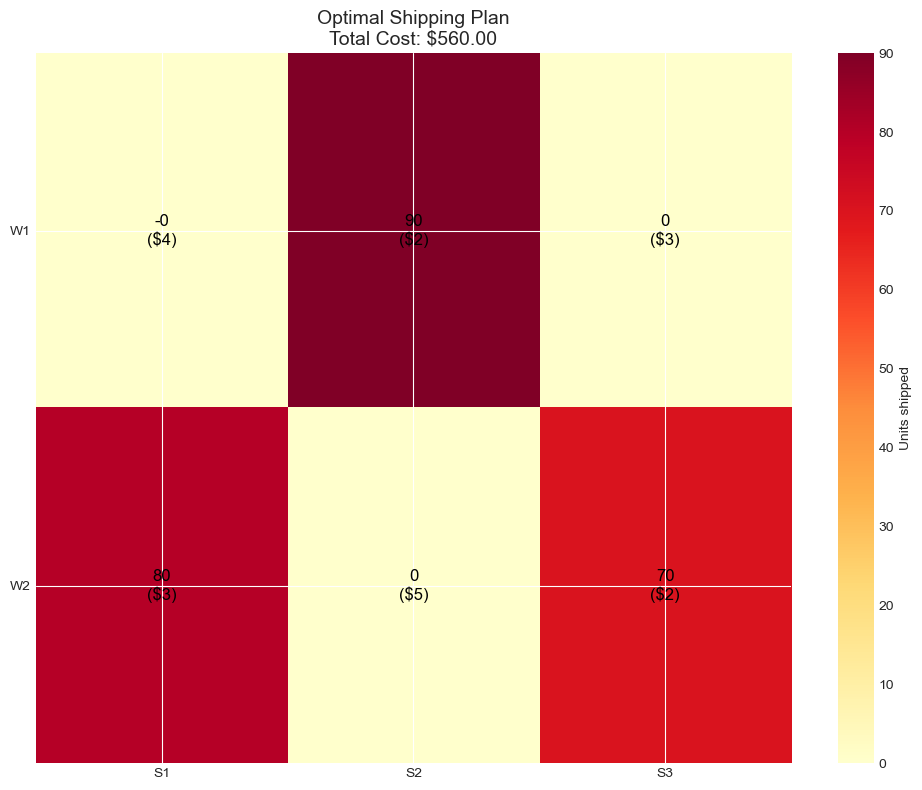


LP optimizes logistics to minimize transportation costs!


In [4]:
# Parameters
warehouses = 2
stores = 3
supply = [100, 150]  # W1, W2
demand = [80, 90, 70]  # S1, S2, S3

# Shipping costs
costs_matrix = [
    [4, 2, 3],  # W1 → S1, S2, S3
    [3, 5, 2]   # W2 → S1, S2, S3
]

# Flatten costs for linprog
c = [costs_matrix[i][j] for i in range(warehouses) for j in range(stores)]
# Order: x[0,0], x[0,1], x[0,2], x[1,0], x[1,1], x[1,2]

print("Transportation Problem")
print("\nWarehouses (supply):")
print(f"  W1: {supply[0]} units")
print(f"  W2: {supply[1]} units")
print(f"  Total supply: {sum(supply)}")

print("\nStores (demand):")
print(f"  S1: {demand[0]} units")
print(f"  S2: {demand[1]} units")
print(f"  S3: {demand[2]} units")
print(f"  Total demand: {sum(demand)}")

print("\nShipping costs ($/unit):")
print("       S1   S2   S3")
for i, costs_row in enumerate(costs_matrix):
    print(f"  W{i+1}   {costs_row[0]}    {costs_row[1]}    {costs_row[2]}")

# Constraints
# Supply constraints (≤)
A_ub = []
b_ub = []

# Warehouse 1 supply
A_ub.append([1, 1, 1, 0, 0, 0])
b_ub.append(supply[0])

# Warehouse 2 supply  
A_ub.append([0, 0, 0, 1, 1, 1])
b_ub.append(supply[1])

# Demand constraints (=)
A_eq = []
b_eq = []

# Store 1 demand
A_eq.append([1, 0, 0, 1, 0, 0])
b_eq.append(demand[0])

# Store 2 demand
A_eq.append([0, 1, 0, 0, 1, 0])
b_eq.append(demand[1])

# Store 3 demand
A_eq.append([0, 0, 1, 0, 0, 1])
b_eq.append(demand[2])

# Non-negativity
bounds = [(0, None) for _ in range(warehouses * stores)]

# Solve
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, 
                bounds=bounds, method='highs')

if result.success:
    min_cost = result.fun
    
    # Reshape solution
    shipments = result.x.reshape(warehouses, stores)
    
    print("\n" + "="*50)
    print("Optimal shipping plan:")
    print("="*50)
    print("\n       S1    S2    S3   | Shipped")
    print("-" * 40)
    for i in range(warehouses):
        row_str = f"  W{i+1}  "
        for j in range(stores):
            row_str += f"{shipments[i, j]:5.0f}  "
        row_str += f"| {shipments[i].sum():.0f}/{supply[i]}"
        print(row_str)
    
    print("-" * 40)
    recv = "  Recv  "
    for j in range(stores):
        recv += f"{shipments[:, j].sum():5.0f}  "
    print(recv)
    
    print(f"\n  Minimum cost: ${min_cost:.2f}")
    
    # Verify constraints
    print("\nConstraint verification:")
    for i in range(warehouses):
        shipped = shipments[i].sum()
        print(f"  W{i+1} shipped {shipped:.0f} ≤ {supply[i]} {'✓' if shipped <= supply[i] else '✗'}")
    
    for j in range(stores):
        received = shipments[:, j].sum()
        print(f"  S{j+1} received {received:.0f} = {demand[j]} {'✓' if abs(received - demand[j]) < 0.01 else '✗'}")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Heatmap of shipments
    im = ax.imshow(shipments, cmap='YlOrRd', aspect='auto')
    
    # Labels
    ax.set_xticks(range(stores))
    ax.set_yticks(range(warehouses))
    ax.set_xticklabels([f'S{j+1}' for j in range(stores)])
    ax.set_yticklabels([f'W{i+1}' for i in range(warehouses)])
    
    # Annotate shipments and costs
    for i in range(warehouses):
        for j in range(stores):
            text = ax.text(j, i, f'{shipments[i, j]:.0f}\n(${costs_matrix[i][j]})',
                         ha="center", va="center", color="black", fontsize=12)
    
    ax.set_title(f'Optimal Shipping Plan\nTotal Cost: ${min_cost:.2f}', fontsize=14)
    plt.colorbar(im, ax=ax, label='Units shipped')
    plt.tight_layout()
    plt.show()
    
else:
    print("\nNo feasible solution!")

print("\nLP optimizes logistics to minimize transportation costs!")

## Real Example: Portfolio Optimization (Mean-Variance)

**Problem**: Maximize return for given risk level

**Setup**: 3 assets with returns and risks
- Asset A: 8% return, 12% risk
- Asset B: 12% return, 18% risk
- Asset C: 15% return, 25% risk

**Constraints**:
- Weights sum to 1 (fully invested)
- Maximum 50% in any single asset (diversification)
- Minimum 10% return target

**Note**: This is simplified; real portfolio optimization uses quadratic programming for variance

Portfolio Optimization (Simplified)

Assets:
  Asset A: 8% return, 12% risk
  Asset B: 12% return, 18% risk
  Asset C: 15% return, 25% risk

Constraints:
  - Weights sum to 1 (fully invested)
  - Max 50% in any asset (diversification)
  - No short selling (w ≥ 0)

Objective: Maximize expected return

Optimal portfolio:
  Asset A: -0.00%
  Asset B: 50.00%
  Asset C: 50.00%

Portfolio metrics:
  Expected return: 13.50%
  Estimated risk: 15.40%
  Sharpe ratio (approx): 0.88

Verification:
  Sum of weights: 1.0000 = 1.0 ✓
  Max weight: 50.00% ≤ 50% ✓


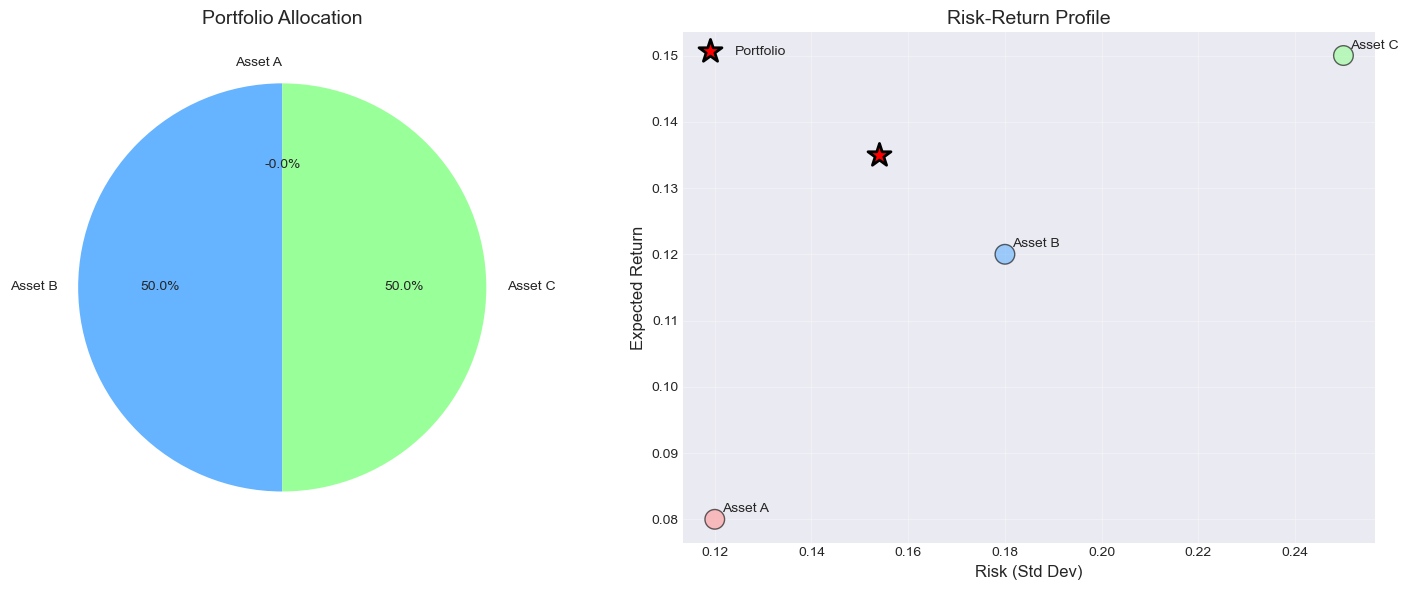


LP allocates capital to maximize returns within constraints!


In [5]:
# Asset parameters
returns = [0.08, 0.12, 0.15]  # Expected returns
risks = [0.12, 0.18, 0.25]     # Risks (std dev)

# Objective: Maximize return → Minimize -return
c = [-r for r in returns]

# Constraints
# 1. Sum of weights = 1 (equality)
A_eq = [[1, 1, 1]]
b_eq = [1]

# 2. Each weight ≤ 0.5 (diversification)
A_ub = [
    [1, 0, 0],  # w_A ≤ 0.5
    [0, 1, 0],  # w_B ≤ 0.5
    [0, 0, 1]   # w_C ≤ 0.5
]
b_ub = [0.5, 0.5, 0.5]

# 3. Non-negativity (no shorting)
bounds = [(0, None) for _ in range(3)]

print("Portfolio Optimization (Simplified)")
print("\nAssets:")
print("  Asset A: 8% return, 12% risk")
print("  Asset B: 12% return, 18% risk")
print("  Asset C: 15% return, 25% risk")
print("\nConstraints:")
print("  - Weights sum to 1 (fully invested)")
print("  - Max 50% in any asset (diversification)")
print("  - No short selling (w ≥ 0)")
print("\nObjective: Maximize expected return\n")

# Solve
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
                bounds=bounds, method='highs')

if result.success:
    weights = result.x
    portfolio_return = -result.fun  # Negative because minimized -return
    
    # Approximate portfolio risk (simplified)
    portfolio_risk = np.sqrt(sum(weights[i]**2 * risks[i]**2 for i in range(3)))
    
    print("="*50)
    print("Optimal portfolio:")
    print("="*50)
    assets = ['Asset A', 'Asset B', 'Asset C']
    for i, (asset, w) in enumerate(zip(assets, weights)):
        print(f"  {asset}: {w*100:.2f}%")
    
    print(f"\nPortfolio metrics:")
    print(f"  Expected return: {portfolio_return*100:.2f}%")
    print(f"  Estimated risk: {portfolio_risk*100:.2f}%")
    print(f"  Sharpe ratio (approx): {portfolio_return/portfolio_risk:.2f}")
    
    # Verify
    print(f"\nVerification:")
    print(f"  Sum of weights: {weights.sum():.4f} = 1.0 ✓")
    print(f"  Max weight: {weights.max()*100:.2f}% ≤ 50% ✓")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Allocation pie chart
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    axes[0].pie(weights, labels=assets, autopct='%1.1f%%', 
               colors=colors, startangle=90)
    axes[0].set_title('Portfolio Allocation', fontsize=14)
    
    # Risk-return scatter
    axes[1].scatter(risks, returns, s=200, c=colors, alpha=0.6, edgecolors='black')
    for i, asset in enumerate(assets):
        axes[1].annotate(asset, (risks[i], returns[i]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    axes[1].scatter(portfolio_risk, portfolio_return, s=300, c='red', 
                   marker='*', edgecolors='black', linewidths=2,
                   label='Portfolio', zorder=5)
    axes[1].set_xlabel('Risk (Std Dev)', fontsize=12)
    axes[1].set_ylabel('Expected Return', fontsize=12)
    axes[1].set_title('Risk-Return Profile', fontsize=14)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No feasible solution!")

print("\nLP allocates capital to maximize returns within constraints!")

## Summary

### Main Function:

```python
from scipy.optimize import linprog

result = linprog(
    c,                    # Coefficients to minimize
    A_ub=A_ub,           # Inequality constraints (≤)
    b_ub=b_ub,
    A_eq=A_eq,           # Equality constraints (=)
    b_eq=b_eq,
    bounds=bounds,        # Variable bounds
    method='highs'        # Algorithm: 'highs', 'highs-ds', 'interior-point'
)
```

### Standard Form:

Minimize: c^T·x

Subject to:
- A_ub·x ≤ b_ub (inequality)
- A_eq·x = b_eq (equality)
- bounds: l ≤ x ≤ u

### Converting to Standard Form:

| Original | Convert to |
|----------|------------|
| Maximize c·x | Minimize -c·x |
| a·x ≥ b | -a·x ≤ -b |
| a·x = b | Use A_eq, b_eq |
| x unrestricted | Split: x = x⁺ - x⁻ |

### Methods:

| Method | Speed | Robustness | Use When |
|--------|-------|------------|----------|
| **highs** | Fast | High | Default choice |
| **highs-ds** | Fast | High | Dual simplex |
| **interior-point** | Medium | Medium | Large problems |
| **revised simplex** | Slow | High | Exact arithmetic |

### Applications:

✓ **Manufacturing**: Production planning, inventory  
✓ **Supply chain**: Transportation, distribution  
✓ **Finance**: Portfolio allocation (simplified)  
✓ **Scheduling**: Staff allocation, job scheduling  
✓ **Nutrition**: Diet optimization  
✓ **Telecommunications**: Network routing  

### Best Practices:

✓ **Scale variables** to similar magnitude  
✓ **Check feasibility** if optimization fails  
✓ **Examine dual values** for sensitivity analysis  
✓ **Visualize** for 2D problems  
✓ **Use sparse matrices** for large problems  

### Interpreting Results:

```python
if result.success:
    x_optimal = result.x          # Optimal solution
    obj_value = result.fun        # Objective value
    slack = result.slack          # Unused resources (inequality)
    dual_values = result.eqlin    # Shadow prices (equality)
```

### Common Issues:

⚠️ **Infeasible**: No solution satisfies all constraints  
⚠️ **Unbounded**: Objective can decrease indefinitely  
⚠️ **Numerical issues**: Scale variables properly  
⚠️ **Integer variables**: Use integer programming (separate methods)  

### Extensions:

- **Integer LP**: Use `scipy.optimize.milp` or specialized solvers (CPLEX, Gurobi)
- **Quadratic programming**: For portfolio optimization with covariance
- **Network flow**: Specialized algorithms for graphs
- **Multi-objective**: Pareto optimization